# Feature engineering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:\\Users\\ssure\OneDrive\\Desktop\DATAMITES LASTONE\\last\\MLE-Feature Engineering-20250203T131939Z-001\\MLE-Feature Engineering\\loan_approved.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe(include = "O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
# Checking null values
df.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

## Imputing the null values :

In [7]:
df.loc[df['Gender'].isnull(),'Gender']="Male"

In [8]:
df.Gender.isnull().sum()

0

In [9]:
df.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [10]:
df.loc[df['Credit_History'].isnull(),'Credit_History']=0.0

In [11]:
df.loc[df['LoanAmount'].isnull(),'LoanAmount']=df['LoanAmount'].median()

In [12]:
df.loc[df['Married'].isnull(),'Married']="Yes"

In [13]:
df.loc[df['Self_Employed'].isnull(),'Self_Employed']='No'

In [14]:
df.loc[df['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']=360.0

In [15]:
df.loc[df['Dependents'].isnull(),'Dependents']='0'

In [16]:
df.isnull().sum()

Loan_ID                   0
Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

# Outliers :

# Visualizing the outliers :

<Axes: xlabel='LoanAmount'>

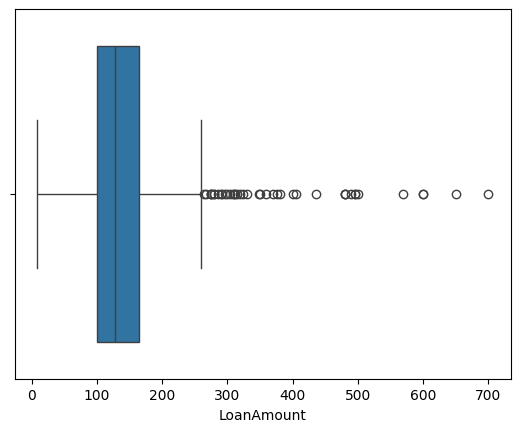

In [17]:
sns.boxplot(x=df.LoanAmount ,orient='h')

# Handling the outliers :

# Using Winsorize Method to handle outliers :

In [18]:
from scipy.stats.mstats import winsorize

# Specify the percentage of data to be trimmed from both ends
trim_percentage = 0.05

# Winsorize the specified column
df['LoanAmount'] = winsorize(df['LoanAmount'], limits=trim_percentage)

<Axes: xlabel='LoanAmount'>

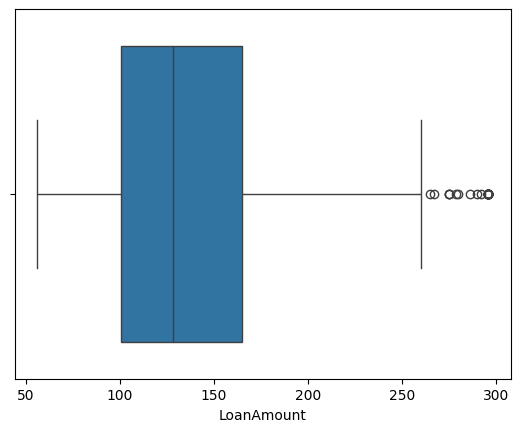

In [19]:
sns.boxplot(x=df.LoanAmount ,orient='h')

<Axes: xlabel='ApplicantIncome'>

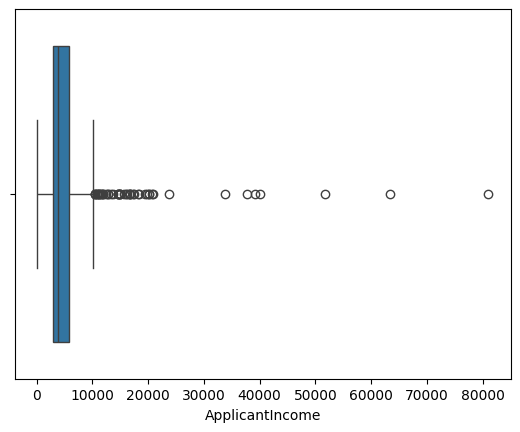

In [20]:
sns.boxplot(x=df.ApplicantIncome ,orient='h')

In [21]:
from scipy.stats.mstats import winsorize

# Specify the percentage of data to be trimmed from both ends
trim_percentage = 0.05

# Winsorize the specified column
df['ApplicantIncome'] = winsorize(df['ApplicantIncome'], limits=trim_percentage)

# Using IQR method to handle the outliers :

In [22]:
# Calculate quartiles
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)

In [23]:
# Calculate IQR
IQR = Q3 - Q1
IQR

64.5

In [24]:
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

3.5
261.5


In [25]:
# Remove outliers
df = df[(df['LoanAmount'] >= lower_bound) & (df['LoanAmount'] <= upper_bound)]

<Axes: xlabel='LoanAmount'>

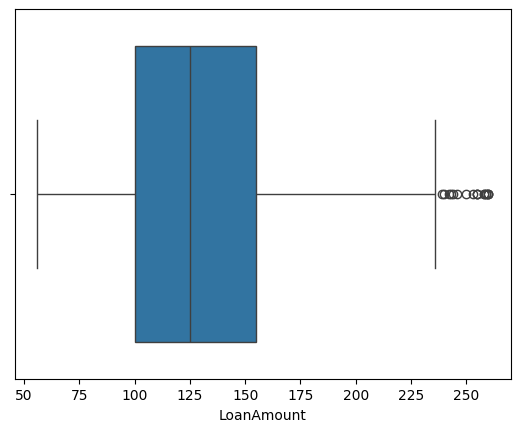

In [26]:
sns.boxplot(x=df.LoanAmount ,orient='h')

# Preprocessing :

# Data Cleaning :

In [27]:
df=df.drop(['Dependents'], axis=1)

In [28]:
df = df.drop(['Loan_ID'], axis = 1)

In [29]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,Male,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,4106,0.0,56.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Encoding Techniques :

# OHE :

##  One-Hot Encoding:
- One-hot encoding is the most widely used categorical encoding technique. It is suitable for nominal categorical variables, where the categories have no inherent order or relationship. The idea behind one-hot encoding is to represent each category as a binary vector. Here’s how it works:

- For each category in a categorical column, a new binary column is created
- The binary column will have a value of 1 if the class is present, else it will be zero
- For example, if you have a categorical feature “Color” with values “Yellow”, “Blue,” and “Green,” one-hot encoding would convert it into three binary columns:

### When to use: Ideally for categorical features with less than 10 categories.

# Using One Hot Encoding :

In [30]:
df_encoded = pd.get_dummies(df, columns=['Married'], prefix='Married',dtype = int)

In [31]:
df_encoded

,Gender,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Married_No,Married_Yes
0,Male,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,1,0
1,Male,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1
2,Male,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,Male,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,Male,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1,0
610,Male,Graduate,No,4106,0.0,56.0,180.0,1.0,Rural,Y,0,1
611,Male,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,0,1
612,Male,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,0,1


# Label Encoding :

### When to use: Categorical features with two categories


# Using Label encoding :

In [32]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'matchType' column to obtain label-encoded values
df['Gender'] = encoder.fit_transform(df['Gender'])


In [33]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,1,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,1,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,0,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,1,Yes,Graduate,No,4106,0.0,56.0,180.0,1.0,Rural,Y
611,1,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,1,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'matchType' column to obtain label-encoded values
df['Loan_Status (Approved)'] = encoder.fit_transform(df['Loan_Status (Approved)'])

In [35]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,1,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,No,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,1,Yes,Graduate,No,4106,0.0,56.0,180.0,1.0,Rural,1
611,1,Yes,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,1,Yes,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


# Ordinal Encoding :

### When to use: The best option for ordinal features that have some orders and hierarchy.

# Using Ordinal Encoder :

In [36]:
df.Education.value_counts()

Education
Graduate        440
Not Graduate    133
Name: count, dtype: int64

In [37]:
from sklearn.preprocessing import OrdinalEncoder
Education_enc=OrdinalEncoder(categories=[['Graduate', 'Not Graduate']])


In [38]:
df['Education'] = Education_enc.fit_transform(df[['Education']])

In [39]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,1,No,0.0,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,Yes,0.0,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,Yes,0.0,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,Yes,1.0,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,No,0.0,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,No,0.0,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,1,Yes,0.0,No,4106,0.0,56.0,180.0,1.0,Rural,1
611,1,Yes,0.0,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,1,Yes,0.0,No,7583,0.0,187.0,360.0,1.0,Urban,1


# Transformation:

# Logarithmic Transformation :

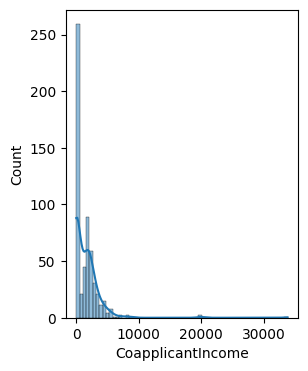

In [40]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['CoapplicantIncome'], kde= True) # left screwed
plt.show()

In [41]:
df['CoapplicantIncome']=np.log(df['CoapplicantIncome'])

# Using Exponential Transformers :

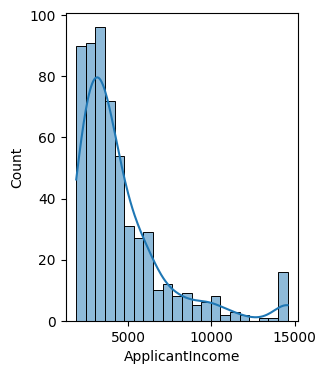

In [42]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['ApplicantIncome'], kde= True) # left screwed
plt.show()

In [43]:
df['ApplicantIncome_exponential']=df.ApplicantIncome**(1/1.9)

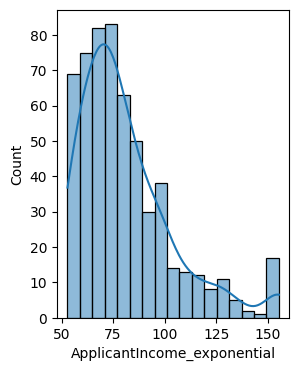

In [44]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['ApplicantIncome_exponential'], kde= True)
plt.show()

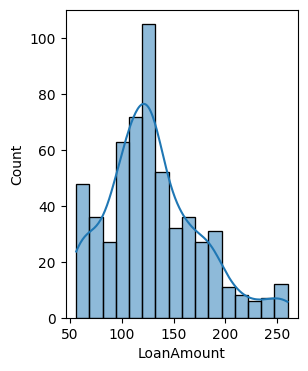

In [45]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['LoanAmount'], kde= True) # left screwed
plt.show()

# Square root transformatin

In [46]:
df['LoanAmount']=np.sqrt(df['LoanAmount']) # this column is right scre

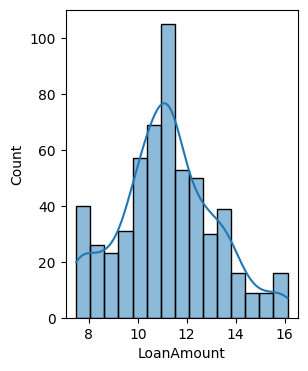

In [47]:
plt.figure(figsize=(3,4))
sns.histplot(x=df['LoanAmount'], kde= True)
plt.show()